In [2]:
#Import the Library
import numpy as np 
import math
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

%matplotlib inline

In [6]:
#Import the dataset
df=pd.read_csv("corporate_rating.csv")
df.head()

,Rating,Name,Symbol,Rating Agency Name,Date,Sector,currentRatio,quickRatio,cashRatio,daysOfSalesOutstanding,...,effectiveTaxRate,freeCashFlowOperatingCashFlowRatio,freeCashFlowPerShare,cashPerShare,companyEquityMultiplier,ebitPerRevenue,enterpriseValueMultiple,operatingCashFlowPerShare,operatingCashFlowSalesRatio,payablesTurnover
0,A,Whirlpool Corporation,WHR,Egan-Jones Ratings Company,11/27/2015,Consumer Durables,0.945894,0.426395,0.099690,44.203245,...,0.202716,0.437551,6.810673,9.809403,4.008012,0.049351,7.057088,15.565438,0.058638,3.906655
1,BBB,Whirlpool Corporation,WHR,Egan-Jones Ratings Company,2/13/2014,Consumer Durables,1.033559,0.498234,0.203120,38.991156,...,0.074155,0.541997,8.625473,17.402270,3.156783,0.048857,6.460618,15.914250,0.067239,4.002846
2,BBB,Whirlpool Corporation,WHR,Fitch Ratings,3/6/2015,Consumer Durables,0.963703,0.451505,0.122099,50.841385,...,0.214529,0.513185,9.693487,13.103448,4.094575,0.044334,10.491970,18.888889,0.074426,3.483510
3,BBB,Whirlpool Corporation,WHR,Fitch Ratings,6/15/2012,Consumer Durables,1.019851,0.510402,0.176116,41.161738,...,1.816667,-0.147170,-1.015625,14.440104,3.630950,-0.012858,4.080741,6.901042,0.028394,4.581150
4,BBB,Whirlpool Corporation,WHR,Standard & Poor's Ratings Services,10/24/2016,Consumer Durables,0.957844,0.495432,0.141608,47.761126,...,0.166966,0.451372,7.135348,14.257556,4.012780,0.053770,8.293505,15.808147,0.058065,3.857790


In [7]:
df.shape

(2029, 31)

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2029 entries, 0 to 2028
Data columns (total 31 columns):
 #   Column                              Non-Null Count  Dtype  
---  ------                              --------------  -----  
 0   Rating                              2029 non-null   object 
 1   Name                                2029 non-null   object 
 2   Symbol                              2029 non-null   object 
 3   Rating Agency Name                  2029 non-null   object 
 4   Date                                2029 non-null   object 
 5   Sector                              2029 non-null   object 
 6   currentRatio                        2029 non-null   float64
 7   quickRatio                          2029 non-null   float64
 8   cashRatio                           2029 non-null   float64
 9   daysOfSalesOutstanding              2029 non-null   float64
 10  netProfitMargin                     2029 non-null   float64
 11  pretaxProfitMargin                  2029 no

In [9]:
df.isnull().sum()

Rating                                0
Name                                  0
Symbol                                0
Rating Agency Name                    0
Date                                  0
Sector                                0
currentRatio                          0
quickRatio                            0
cashRatio                             0
daysOfSalesOutstanding                0
netProfitMargin                       0
pretaxProfitMargin                    0
grossProfitMargin                     0
operatingProfitMargin                 0
returnOnAssets                        0
returnOnCapitalEmployed               0
returnOnEquity                        0
assetTurnover                         0
fixedAssetTurnover                    0
debtEquityRatio                       0
debtRatio                             0
effectiveTaxRate                      0
freeCashFlowOperatingCashFlowRatio    0
freeCashFlowPerShare                  0
cashPerShare                          0


In [10]:
df.duplicated().sum()

0

In [11]:
df.Rating.value_counts()

BBB    671
BB     490
A      398
B      302
AA      89
CCC     64
AAA      7
CC       5
C        2
D        1
Name: Rating, dtype: int64

In [12]:
rating_label = {'AAA':'Lowest Risk', 
               'AA':'Low Risk',
               'A':'Low Risk',
               'BBB':'Medium Risk', 
               'BB':'High Risk',
               'B':'High Risk',
               'CCC':'Highest Risk', 
               'CC':'Highest Risk',
               'C':'Highest Risk',
               'D':'In Default'}

df.Rating = df.Rating.map(rating_label)

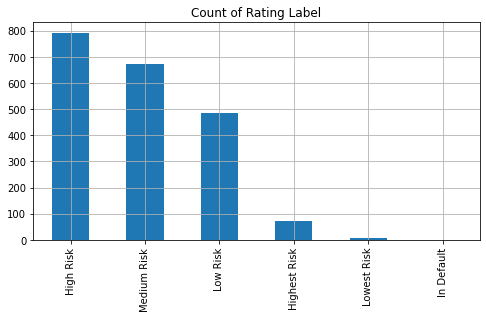

In [13]:
ax = df['Rating'].value_counts().plot(kind='bar',
                                             figsize=(8,4),
                                             title="Count of Rating Label",
                                             grid=True)

In [14]:
# Statistical summary 
df.describe()

,currentRatio,quickRatio,cashRatio,daysOfSalesOutstanding,netProfitMargin,pretaxProfitMargin,grossProfitMargin,operatingProfitMargin,returnOnAssets,returnOnCapitalEmployed,...,effectiveTaxRate,freeCashFlowOperatingCashFlowRatio,freeCashFlowPerShare,cashPerShare,companyEquityMultiplier,ebitPerRevenue,enterpriseValueMultiple,operatingCashFlowPerShare,operatingCashFlowSalesRatio,payablesTurnover
count,2029.000000,2029.000000,2029.000000,2029.000000,2029.000000,2029.000000,2029.000000,2029.000000,2029.000000,2029.000000,...,2029.000000,2029.000000,2.029000e+03,2.029000e+03,2029.000000,2029.000000,2029.000000,2.029000e+03,2029.000000,2029.000000
mean,3.529607,2.653986,0.667364,333.795606,0.278447,0.431483,0.497968,0.587322,-37.517928,-73.974193,...,0.397572,0.409550,5.094719e+03,4.227549e+03,3.323579,0.437454,48.287985,6.515123e+03,1.447653,38.002718
std,44.052361,32.944817,3.583943,4447.839583,6.064134,8.984982,0.525307,11.224622,1166.172220,2350.275719,...,10.595075,3.796488,1.469156e+05,1.224000e+05,87.529866,8.984299,529.118961,1.775290e+05,19.483294,758.923588
min,-0.932005,-1.893266,-0.192736,-811.845623,-101.845815,-124.343612,-14.800817,-124.343612,-40213.178290,-87162.162160,...,-100.611015,-120.916010,-4.912742e+03,-1.915035e+01,-2555.419643,-124.343612,-3749.921337,-1.195049e+04,-4.461837,-76.662850
25%,1.071930,0.602825,0.130630,22.905093,0.021006,0.025649,0.233127,0.044610,0.019176,0.028112,...,0.146854,0.271478,4.119924e-01,1.566038e+00,2.046822,0.028057,6.238066,2.356735e+00,0.073886,2.205912
50%,1.493338,0.985679,0.297493,42.374120,0.064753,0.084965,0.414774,0.107895,0.045608,0.074421,...,0.300539,0.644529,2.131742e+00,3.686513e+00,2.652456,0.087322,9.274398,4.352584e+00,0.133050,5.759722
75%,2.166891,1.453820,0.624906,59.323563,0.114807,0.144763,0.849693,0.176181,0.077468,0.135036,...,0.370653,0.836949,4.230253e+00,8.086152e+00,3.658331,0.149355,12.911759,7.319759e+00,0.240894,9.480892
max,1725.505005,1139.541703,125.917417,115961.637400,198.517873,309.694856,2.702533,410.182214,0.487826,2.439504,...,429.926282,34.594086,5.753380e+06,4.786803e+06,2562.871795,309.694856,11153.607090,6.439270e+06,688.526591,20314.880400


In [15]:
df.corr()

,currentRatio,quickRatio,cashRatio,daysOfSalesOutstanding,netProfitMargin,pretaxProfitMargin,grossProfitMargin,operatingProfitMargin,returnOnAssets,returnOnCapitalEmployed,...,effectiveTaxRate,freeCashFlowOperatingCashFlowRatio,freeCashFlowPerShare,cashPerShare,companyEquityMultiplier,ebitPerRevenue,enterpriseValueMultiple,operatingCashFlowPerShare,operatingCashFlowSalesRatio,payablesTurnover
currentRatio,1.000000,0.104329,0.736042,0.000020,0.003561,-0.002453,0.067326,-0.001224,0.001623,0.001583,...,-0.026461,0.005863,-0.001307,-0.001266,0.000118,-0.002489,-0.002013,-0.001453,-0.001439,-0.002160
quickRatio,0.104329,1.000000,0.125848,0.736630,-0.001931,-0.002208,-0.028343,-0.001820,0.001539,0.001508,...,-0.003940,0.001713,-0.001427,-0.000929,-0.000365,-0.002241,-0.002843,-0.001587,-0.001453,-0.001759
cashRatio,0.736042,0.125848,1.000000,0.006616,-0.007936,-0.006837,-0.050355,-0.000723,0.003326,0.003280,...,-0.024406,-0.013719,-0.001778,-0.001652,-0.001883,-0.006883,-0.007945,-0.002293,0.004459,-0.006915
daysOfSalesOutstanding,0.000020,0.736630,0.006616,1.000000,0.262299,0.278222,-0.068181,0.291002,0.002416,0.002364,...,-0.000926,0.003267,-0.002155,-0.000834,-0.000242,0.278204,-0.019808,-0.002283,0.406126,-0.003026
netProfitMargin,0.003561,-0.001931,-0.007936,0.262299,1.000000,0.991241,-0.099540,0.971483,0.001577,0.001535,...,0.001500,-0.004830,-0.000708,-0.000716,-0.001185,0.991185,-0.003665,-0.000779,0.785592,-0.001681
pretaxProfitMargin,-0.002453,-0.002208,-0.006837,0.278222,0.991241,1.000000,-0.135662,0.992001,0.001637,0.001598,...,-0.000097,-0.005518,-0.000976,-0.000977,-0.001148,0.999975,-0.003867,-0.001080,0.831778,-0.001760
grossProfitMargin,0.067326,-0.028343,-0.050355,-0.068181,-0.099540,-0.135662,1.000000,-0.121829,-0.030745,-0.030128,...,0.018387,0.016868,0.012775,0.012781,0.010026,-0.135715,-0.008007,0.011131,-0.105564,0.034244
operatingProfitMargin,-0.001224,-0.001820,-0.000723,0.291002,0.971483,0.992001,-0.121829,1.000000,0.001675,0.001634,...,0.000173,-0.005949,-0.001205,-0.001205,-0.000962,0.992018,-0.003699,-0.001305,0.871686,-0.002042
returnOnAssets,0.001623,0.001539,0.003326,0.002416,0.001577,0.001637,-0.030745,0.001675,1.000000,0.995426,...,0.001214,0.029072,-0.001283,0.001115,0.002629,0.001659,0.002742,0.002275,0.002385,0.001616
returnOnCapitalEmployed,0.001583,0.001508,0.003280,0.002364,0.001535,0.001598,-0.030128,0.001634,0.995426,1.000000,...,0.001183,0.029901,-0.001162,0.001090,0.002559,0.001619,0.002883,0.002145,0.002334,0.001581


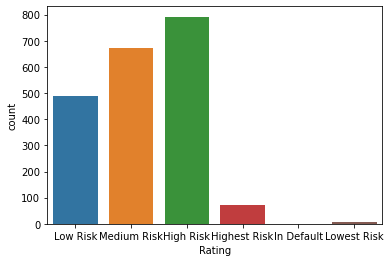

In [16]:
sns.countplot(df['Rating'])
plt.show()

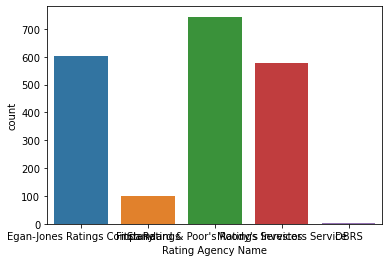

In [18]:
sns.countplot(df['Rating Agency Name'])
plt.show()

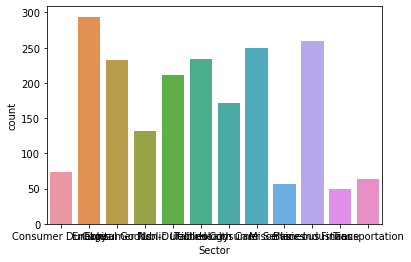

In [19]:
sns.countplot(df['Sector'])
plt.show()

In [22]:
df = df[df['Rating']!='Lowest Risk'] # filter Lowest Risk
df = df[df['Rating']!='In Default']  # filter In Default
df.reset_index(inplace = True, drop=True) # reset index

In [25]:
from random import sample
column_list = list(df.columns[6:31])
column_list = sample(column_list,4) 
print(column_list)

['cashPerShare', 'returnOnEquity', 'fixedAssetTurnover', 'assetTurnover']


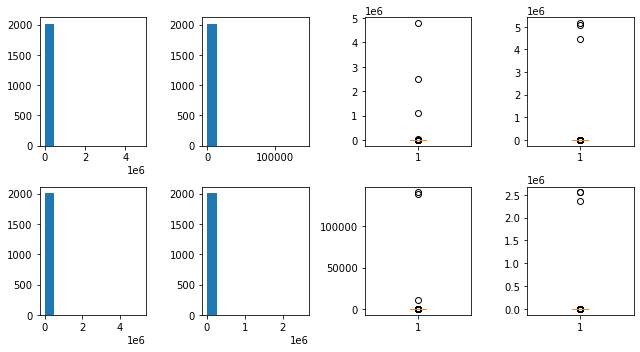

In [26]:
#box plot
figure, axes = plt.subplots(nrows=2, ncols=4, figsize=(9,5))

axes[0, 0].hist(df[column_list[0]])
axes[0, 1].hist(df[column_list[1]])
axes[1, 0].hist(df[column_list[2]])
axes[1, 1].hist(df[column_list[3]])

axes[0, 2].boxplot(df[column_list[0]])
axes[1, 2].boxplot(df[column_list[1]])
axes[0, 3].boxplot(df[column_list[2]])
axes[1, 3].boxplot(df[column_list[3]])

figure.tight_layout()

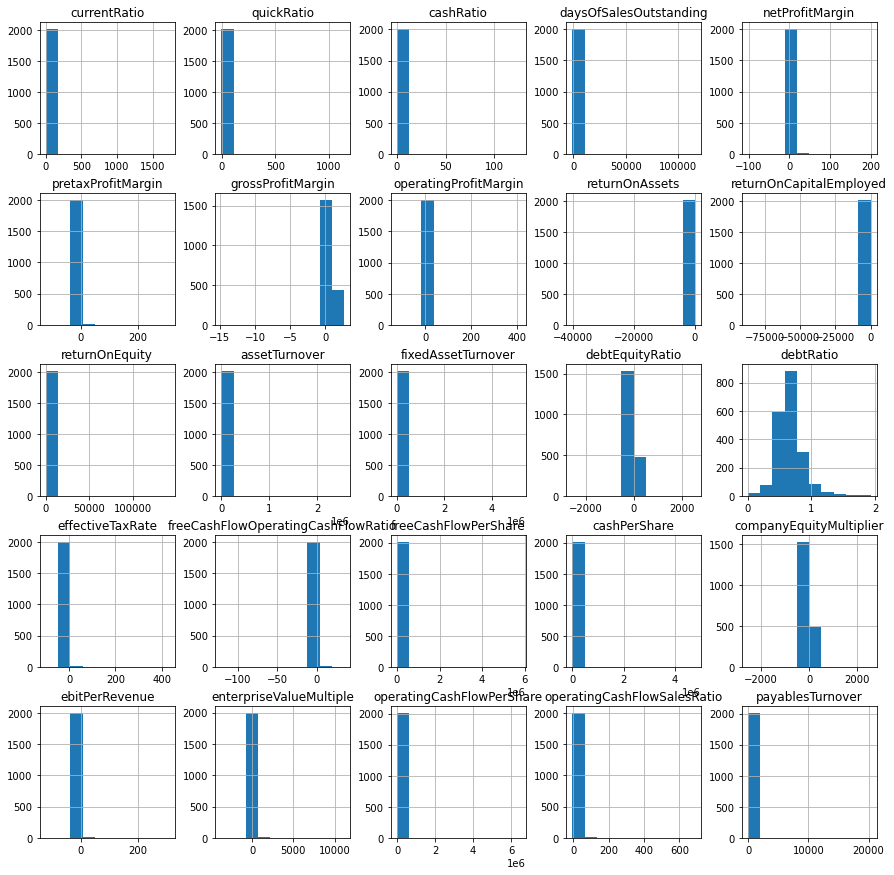

In [27]:
#distribution of the data
df.hist(figsize=(15, 15))
plt.show()

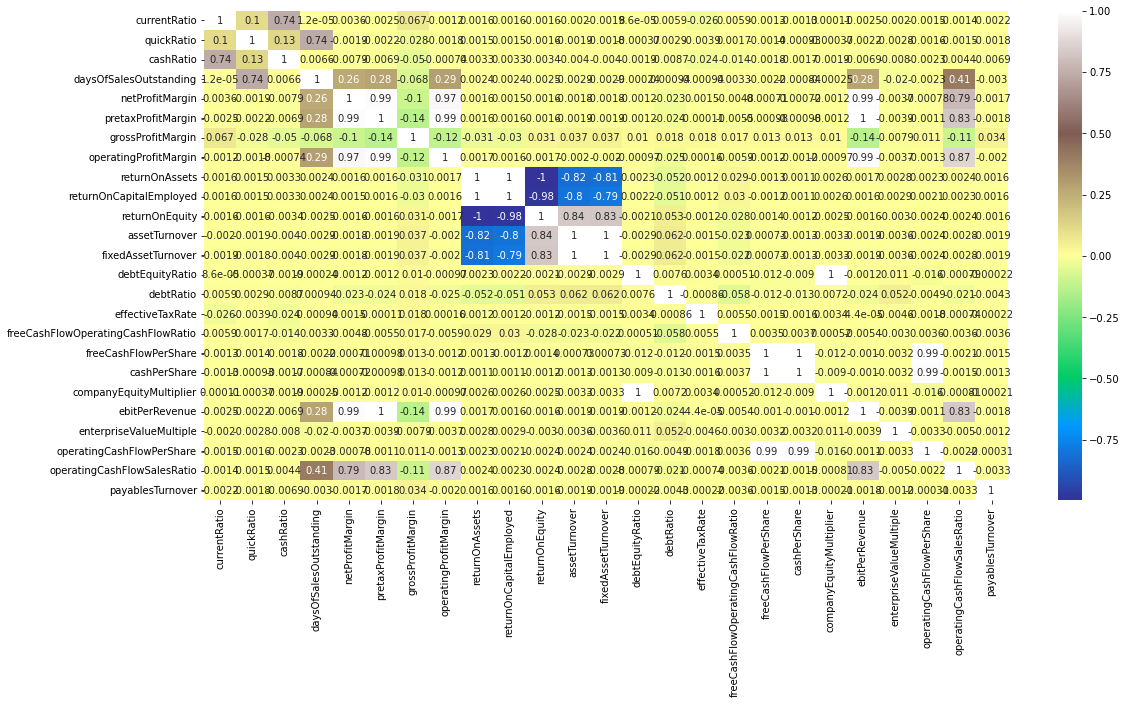

In [29]:
plt.figure(figsize=(18, 9))
sns.heatmap(df.corr(), annot=True, cmap='terrain')
plt.show()

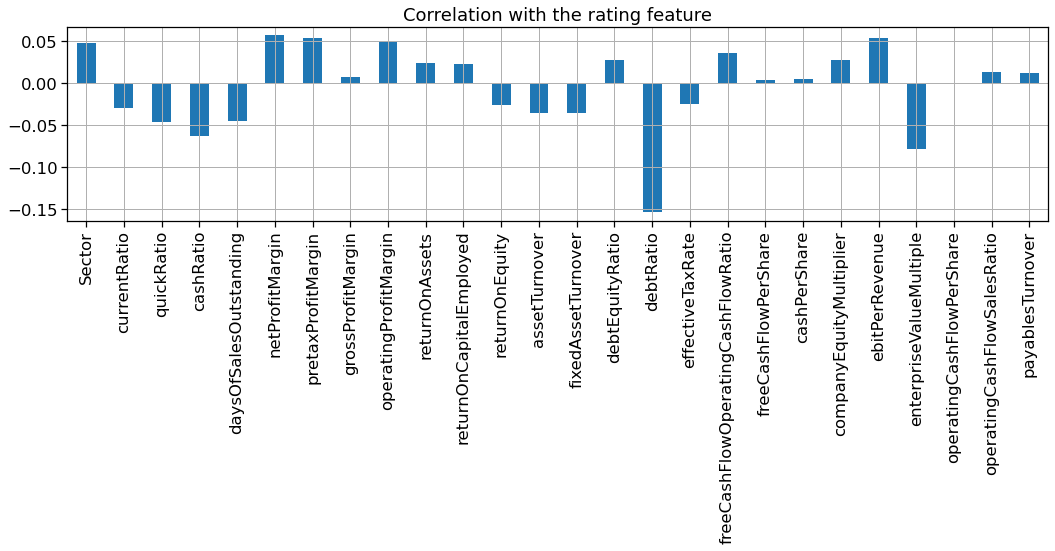

In [67]:
sns.set_context('notebook',font_scale = 1.5)
df.drop('Rating', axis=1).corrwith(df.Rating).plot(kind='bar', grid=True, figsize=(15,8),title="Correlation with the rating feature")
plt.tight_layout()

<AxesSubplot:>

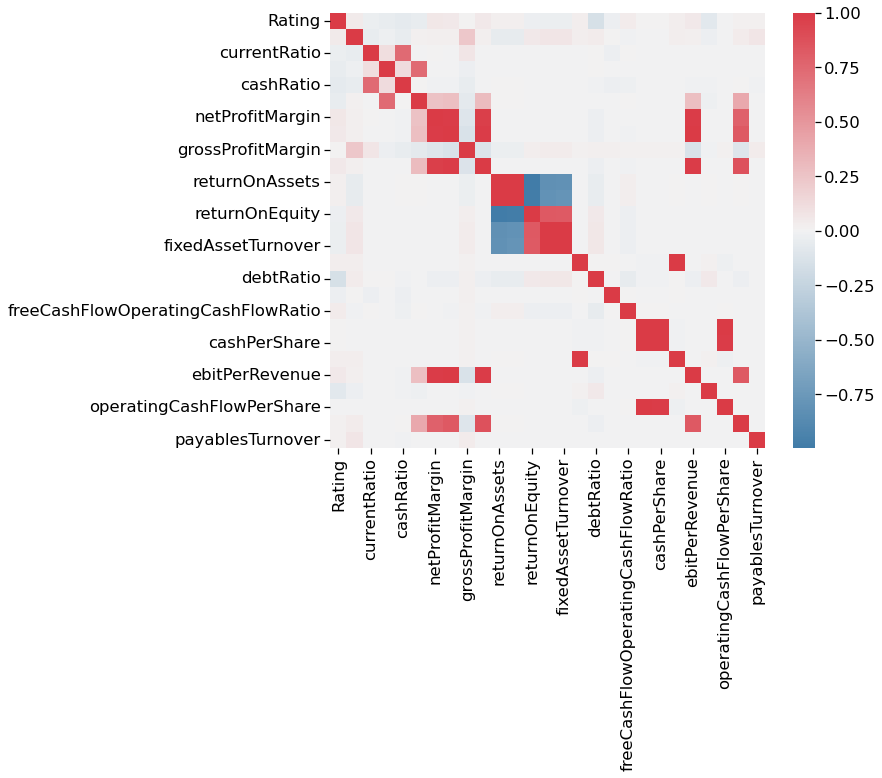

In [68]:
f, ax = plt.subplots(figsize=(10, 8))
corr = df.corr()
sns.heatmap(corr, mask=np.zeros_like(corr, dtype=np.bool), cmap=sns.diverging_palette(240,10,as_cmap=True),
            square=True, ax=ax)

In [28]:
#Skewness and Outliers
df.skew(axis=0)

currentRatio                          34.271115
quickRatio                            30.864610
cashRatio                             27.046952
daysOfSalesOutstanding                20.359098
netProfitMargin                       17.585073
pretaxProfitMargin                    22.052558
grossProfitMargin                    -14.198688
operatingProfitMargin                 26.441502
returnOnAssets                       -32.049111
returnOnCapitalEmployed              -33.252701
returnOnEquity                        31.639845
assetTurnover                         25.968848
fixedAssetTurnover                    26.068762
debtEquityRatio                        0.268074
debtRatio                              1.284256
effectiveTaxRate                      32.265705
freeCashFlowOperatingCashFlowRatio   -22.868222
freeCashFlowPerShare                  33.610677
cashPerShare                          33.958646
companyEquityMultiplier                0.268175
ebitPerRevenue                        22

In [56]:
for c in df.columns[6:31]:

    q1 = df[c].quantile(0.25)
    q3 = df[c].quantile(0.75)
    iqr = q3 - q1 #Interquartile range
    fence_low  = q3-1.5*iqr
    fence_high = q1+1.5*iqr
    lower_out = len(df.loc[(df[c] < fence_low)  ,c])
    upper_out = len(df.loc[(df[c] > fence_high)  ,c])
    outlier_count = upper_out+lower_out
    prop_out = outlier_count/len(df)
    print(c, ": "+"{:.2%}".format(prop_out))

currentRatio : 18.01%
quickRatio : 19.05%
cashRatio : 14.84%
daysOfSalesOutstanding : 23.55%
netProfitMargin : 25.09%
pretaxProfitMargin : 24.49%
grossProfitMargin : 0.99%
operatingProfitMargin : 22.12%
returnOnAssets : 24.25%
returnOnCapitalEmployed : 22.07%
returnOnEquity : 28.70%
assetTurnover : 15.83%
fixedAssetTurnover : 13.46%
debtEquityRatio : 22.07%
debtRatio : 21.33%
effectiveTaxRate : 28.06%
freeCashFlowOperatingCashFlowRatio : 16.92%
freeCashFlowPerShare : 23.55%
cashPerShare : 17.12%
companyEquityMultiplier : 22.02%
ebitPerRevenue : 24.34%
enterpriseValueMultiple : 23.70%
operatingCashFlowPerShare : 17.66%
operatingCashFlowSalesRatio : 16.87%
payablesTurnover : 14.45%


In [57]:
df_outlier = df.copy()

for c in df_outlier.columns[6:31]:
    
    q1 = df_outlier[c].quantile(0.25)
    q3 = df_outlier[c].quantile(0.75)
    iqr = q3 - q1 #Interquartile range
    fence_low  = q3-1.5*iqr
    fence_high = q1+1.5*iqr
    
    for i in range(len(df_outlier)):
        
        if df.loc[i,c] < fence_low or df.loc[i,c] > fence_high: # if Outlier
            
            df_outlier.loc[i,c] = 1
        
        else: # Not Outlier
            df_outlier.loc[i,c] = 0



In [59]:
df_outlier.head()

,Rating,Name,Symbol,Rating Agency Name,Date,Sector,currentRatio,quickRatio,cashRatio,daysOfSalesOutstanding,...,effectiveTaxRate,freeCashFlowOperatingCashFlowRatio,freeCashFlowPerShare,cashPerShare,companyEquityMultiplier,ebitPerRevenue,enterpriseValueMultiple,operatingCashFlowPerShare,operatingCashFlowSalesRatio,payablesTurnover
0,2,Whirlpool Corporation,WHR,Egan-Jones Ratings Company,11/27/2015,2,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
1,3,Whirlpool Corporation,WHR,Egan-Jones Ratings Company,2/13/2014,2,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0
2,3,Whirlpool Corporation,WHR,Fitch Ratings,3/6/2015,2,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0
3,3,Whirlpool Corporation,WHR,Fitch Ratings,6/15/2012,2,0.0,0.0,0.0,0.0,...,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
4,3,Whirlpool Corporation,WHR,Standard & Poor's Ratings Services,10/24/2016,2,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0


<AxesSubplot:>

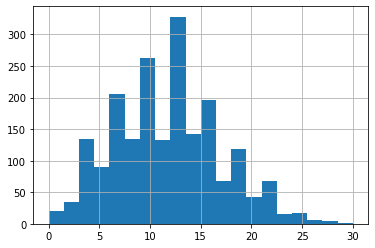

In [60]:
df_outlier["total"] = df_outlier.sum(axis=1)
df_outlier.total.hist(bins = 20)

In [36]:
#data reshaping
from sklearn import preprocessing
min_max_scaler = preprocessing.MinMaxScaler()

for c in df.columns[6:31]:
    df[[c]] = min_max_scaler.fit_transform(df[[c]].to_numpy())*1000

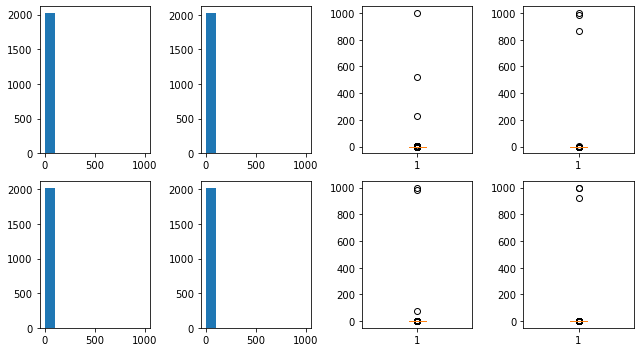

In [61]:
figure, axes = plt.subplots(nrows=2, ncols=4, figsize=(9,5))

axes[0, 0].hist(df[column_list[0]])
axes[0, 1].hist(df[column_list[1]])
axes[1, 0].hist(df[column_list[2]])
axes[1, 1].hist(df[column_list[3]])

axes[0, 2].boxplot(df[column_list[0]])
axes[1, 2].boxplot(df[column_list[1]])
axes[0, 3].boxplot(df[column_list[2]])
axes[1, 3].boxplot(df[column_list[3]])

figure.tight_layout()

In [62]:
df_rating_no_out = df.copy()

for c in df_rating_no_out.columns[6:31]:

    q05 = df_rating_no_out[c].quantile(0.10)
    q95 = df_rating_no_out[c].quantile(0.90)
    iqr = q95 - q05 #Interquartile range
    fence_low  = q05-1.5*iqr
    fence_high = q95+1.5*iqr
    df_rating_no_out.loc[df_rating_no_out[c] > fence_high,c] = df_rating_no_out[c].quantile(0.25)
    df_rating_no_out.loc[df_rating_no_out[c] < fence_low,c] = df_rating_no_out[c].quantile(0.75)
    

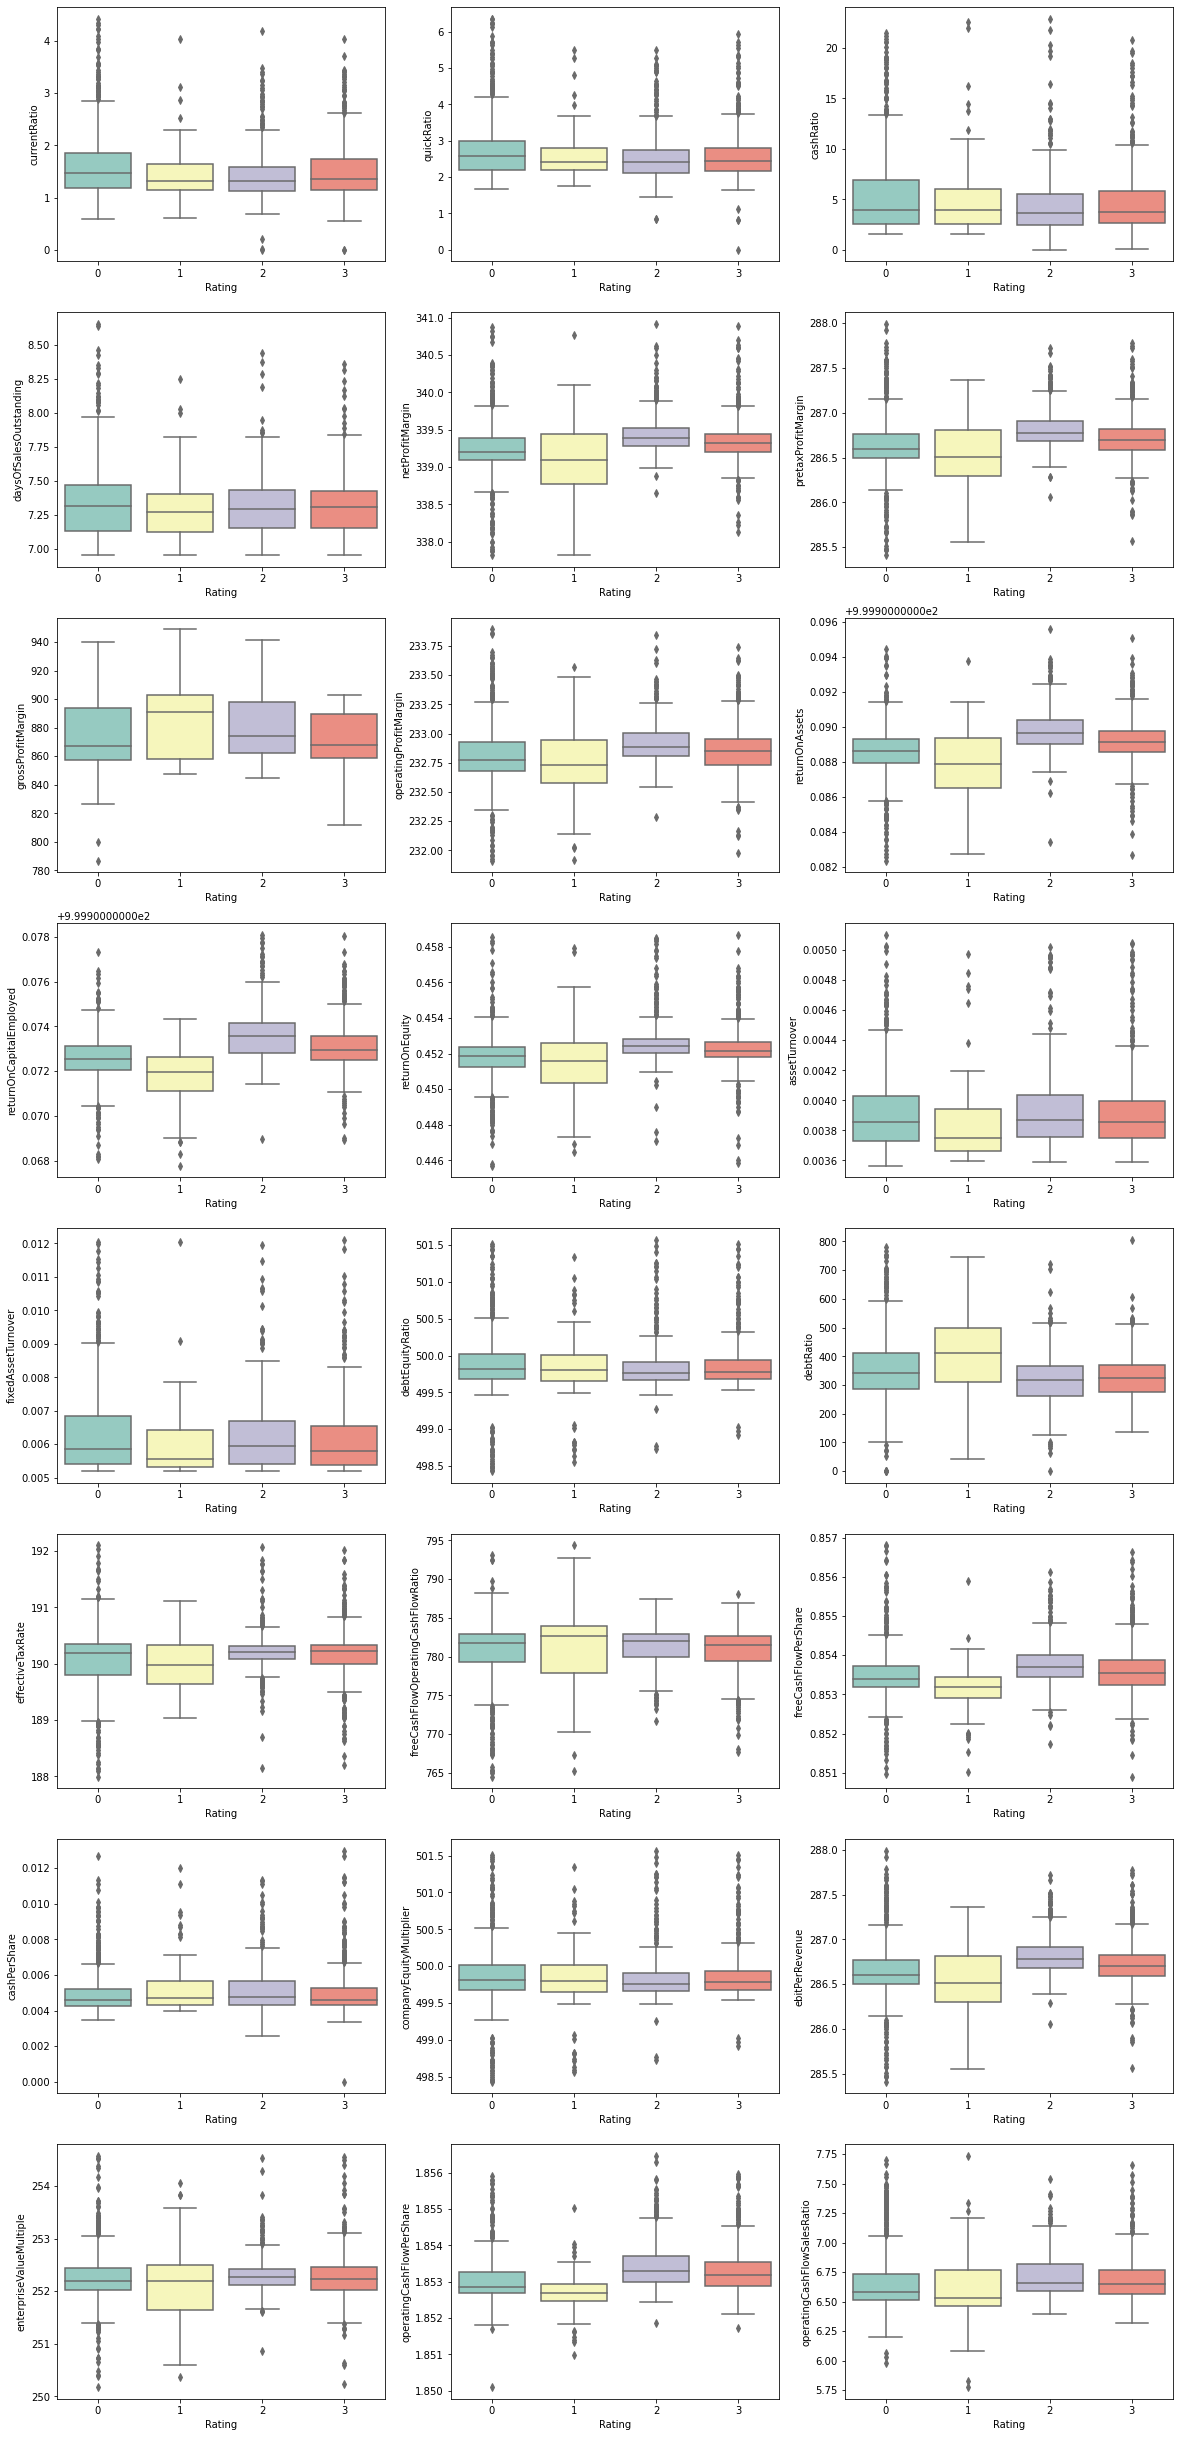

In [63]:
figure, axes = plt.subplots(nrows=8, ncols=3, figsize=(20,44))

i = 0 
j = 0

for c in df_rating_no_out.columns[6:30]:
    
    sns.boxplot(x=df_rating_no_out.Rating, y=df_rating_no_out[c], palette="Set3", ax=axes[i, j])
    
    if j == 2:
        j=0
        i+=1
    else:
        j+=1   

In [64]:
df.colors = 'a'
df_rating_no_out.loc[df_rating_no_out['Rating'] == 'Lowest Risk', 'color'] = 'r'
df_rating_no_out.loc[df_rating_no_out['Rating'] == 'Low Risk', 'color'] = 'g'
df_rating_no_out.loc[df_rating_no_out['Rating'] == 'Medium Risk', 'color'] = 'b'
df_rating_no_out.loc[df_rating_no_out['Rating'] == 'High Risk','color'] = 'y'
df_rating_no_out.loc[df_rating_no_out['Rating'] == 'Highest Risk', 'color'] = 'm'

In [65]:
column_list = list(df.columns[6:31])
column_list = sample(column_list,12)

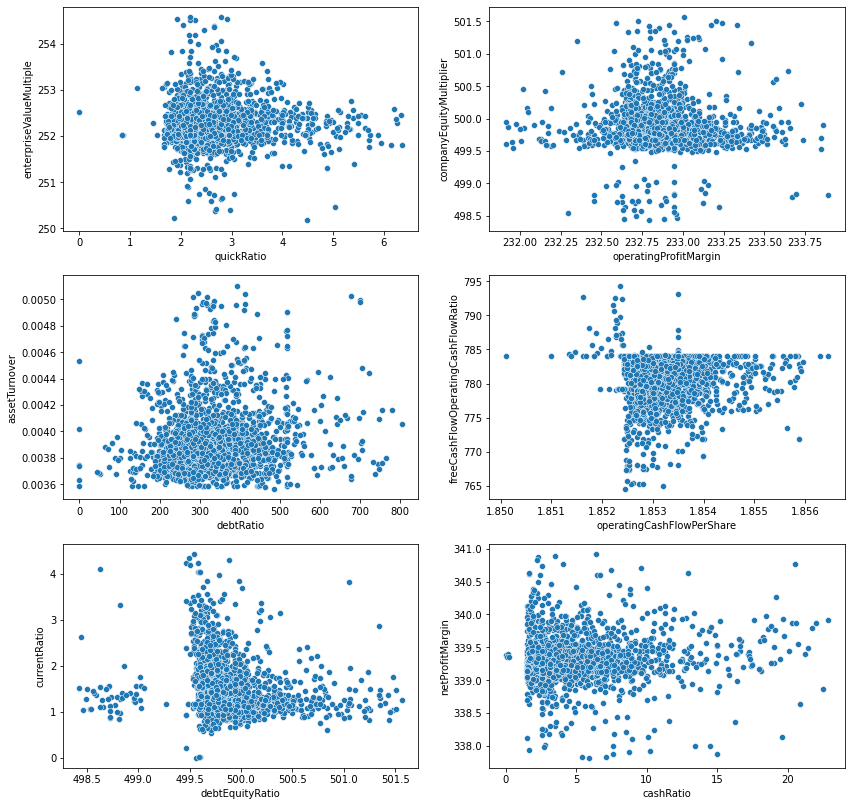

In [66]:
figure, axes = plt.subplots(nrows=3, ncols=2, figsize=(14,14))

i = 0 
j = 0

for c in range(0,12, 2):

    sns.scatterplot(x = column_list[c], y=column_list[c+1], hue="color", data=df_rating_no_out, ax=axes[j,i])
    
    if i == 1:
        i = 0
        j +=1
    
    else:
        i+=1

In [47]:
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score
from sklearn import metrics

In [48]:
#prepare the dataset
label = preprocessing.LabelEncoder()
label.fit(df.Sector)
df.Sector = label.transform(df.Sector) # encode sector
label.fit(df.Rating)
df.Rating = label.transform(df.Rating)

In [49]:
xtrain, xtest = train_test_split(df, test_size = 0.2, random_state = 1)
#df_train, df_test = train_test_split(df, test_size=0.2, random_state = 1)

In [50]:
X_train, y_train = xtrain.iloc[:,5:31], xtrain.iloc[:,0]
X_test, y_test = xtest.iloc[:,5:31], xtest.iloc[:,0]

In [51]:
#Neural Network
# Fit the Multi Layer Perception Model(MLP)
from sklearn.neural_network import MLPClassifier
MLP_model = MLPClassifier(hidden_layer_sizes=(5,5,5), activation='logistic', solver='adam', max_iter=1500)
MLP_model.fit(X_train, y_train)
y_pred_MLP = MLP_model.predict(X_test)
Accuracy_MLP = metrics.accuracy_score(y_test, y_pred_MLP)
print("MLP Accuracy:",Accuracy_MLP)

MLP Accuracy: 0.4222222222222222


In [52]:
#Fit the LogisticRegression model
from sklearn.linear_model import LogisticRegression
LR_model = LogisticRegression(random_state=1234 , multi_class='multinomial', solver='newton-cg')
LR_model = LR_model.fit(X_train, y_train)
y_pred_LR = LR_model.predict(X_test)
Accuracy_LR = metrics.accuracy_score(y_test, y_pred_LR)
print("LR Accuracy:",Accuracy_LR)

LR Accuracy: 0.3950617283950617


In [53]:
#Fit the XGB Model
import xgboost as xgb
from xgboost import XGBClassifier
XGB_model = xgb.XGBRegressor(objective ='multi:softmax', num_class =4)
XGB_model.fit(X_train, y_train)
y_pred_XGB = XGB_model.predict(X_test)
Accuracy_XGB = metrics.accuracy_score(y_test, y_pred_XGB)
print("XGB Accuracy:",Accuracy_XGB)

XGB Accuracy: 0.6765432098765433


In [55]:
#
from lightgbm import LGBMClassifier
lgbm = LGBMClassifier()
lgbm.fit(X_train, y_train)
y_pred_LGBM = lgbm.predict(X_test)
Accuracy_LGBM = metrics.accuracy_score(y_test, y_pred_LGBM)
print("LGBM Accuracy:",Accuracy_LGBM)

XGB Accuracy: 0.6839506172839506
